### connect google drive to colab to access the intern zipped file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive' | grep ".zip"

archive.zip
Artificial Intelligence Internship-20240406T225227Z-001.zip
Bulba Eval form - Google Chrome 2023-12-17 23-25-02.zip
Bulba gen - Google Chrome 2023-12-17 17-51-20.zip
CS task Interview - Google Chrome 2024-01-12 21-15-17.zip
local_multimodal_ai_chat.zip
model-78.zip
Salary Prediction Presentation.pptx - PowerPoint 2024-01-23 08-53-21.zip
Salary Predictions of Data Professions.zip
World Cup 2023 EDA Presentation.pptx - PowerPoint 2024-01-12 04-29-57.zip


In [4]:
!unzip '/content/drive/My Drive/Artificial Intelligence Internship-20240406T225227Z-001.zip'

Archive:  /content/drive/My Drive/Artificial Intelligence Internship-20240406T225227Z-001.zip
  inflating: Artificial Intelligence Internship/Important links.pdf  
  inflating: Artificial Intelligence Internship/Starbucks review Analysis/reviews_data.csv  
  inflating: Artificial Intelligence Internship/AI internship tasks.pdf  
  inflating: Artificial Intelligence Internship/Next word Prediction/Sherlock Holmes Dataset.txt  
  inflating: Artificial Intelligence Internship/Next word Prediction/Problem Statement Next word prediction.pdf  
  inflating: Artificial Intelligence Internship/Starbucks review Analysis/Problem Statement - Starbucks review Analysis.pdf  
  inflating: Artificial Intelligence Internship/Youtube Comments Analysis/Problem Statement - Youtube comments.pdf  
  inflating: Artificial Intelligence Internship/Youtube Comments Analysis/Youtube_comments.csv  


### Read the dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
file_path = r'/content/Artificial Intelligence Internship/Starbucks review Analysis/reviews_data.csv'

In [383]:
df = pd.read_csv(file_path)

### Performing EDA and data processing

In [361]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [268]:
df.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')

In [269]:
df.shape

(850, 6)

In [270]:
df.location.value_counts()

location
New York, NY       14
Los Angeles, CA    12
Seattle, WA        11
Chicago, IL         9
Las Vegas, NV       8
                   ..
Chantilly, VA       1
St. John's, NL      1
Lorton, VA          1
Anaheim, CA         1
Ramsey, NJ          1
Name: count, Length: 633, dtype: int64

In [271]:
df.Date.value_counts()

Date
Reviewed Sept. 14, 2017    4
Reviewed Sept. 9, 2017     3
Reviewed Oct. 4, 2011      3
Reviewed June 22, 2016     3
Reviewed Sept. 12, 2017    3
                          ..
Reviewed Dec. 28, 2017     1
Reviewed Dec. 27, 2017     1
Reviewed Dec. 26, 2017     1
Reviewed Dec. 25, 2017     1
Reviewed July 19, 2000     1
Name: count, Length: 741, dtype: int64

In [384]:
df.drop_duplicates(inplace=True)

In [385]:
df.shape

(849, 6)

In [274]:
df.describe()

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         849 non-null    object 
 1   location     849 non-null    object 
 2   Date         849 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       849 non-null    object 
 5   Image_Links  849 non-null    object 
dtypes: float64(1), object(5)
memory usage: 46.4+ KB


In [277]:
df.Rating.value_counts()

Rating
1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: count, dtype: int64

In [278]:
df.Rating.value_counts().index

Index([1.0, 2.0, 5.0, 4.0, 3.0], dtype='float64', name='Rating')

In [279]:
df.Rating.value_counts().keys()

Index([1.0, 2.0, 5.0, 4.0, 3.0], dtype='float64', name='Rating')

In [280]:
df.Rating.value_counts().values

array([451,  99,  83,  39,  33])

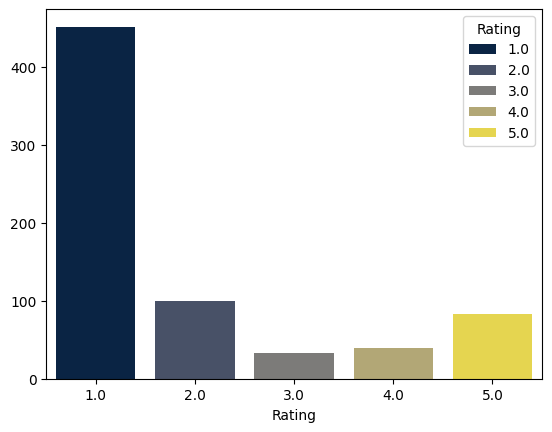

In [281]:
sns.barplot(x = df.Rating.value_counts().keys(),
            hue = df.Rating.value_counts().keys(),
            y = df.Rating.value_counts().values,
            palette = 'cividis');

- Extract the Year only from Date

In [282]:
df.Date[:10]

0    Reviewed Sept. 13, 2023
1     Reviewed July 16, 2023
2      Reviewed July 5, 2023
3      Reviewed May 26, 2023
4     Reviewed Jan. 22, 2023
5    Reviewed Sept. 14, 2023
6     Reviewed Sept. 8, 2023
7     Reviewed Aug. 25, 2023
8      Reviewed Aug. 5, 2023
9      Reviewed Aug. 4, 2023
Name: Date, dtype: object

In [317]:
month_day_year = df.Date.str.replace(',', '').str.replace('.', '').str.replace('Reviewed', '').str.split()

In [318]:
month_day_year[:10]

0    [Sept, 13, 2023]
1    [July, 16, 2023]
2     [July, 5, 2023]
3     [May, 26, 2023]
4     [Jan, 22, 2023]
5    [Sept, 14, 2023]
6     [Sept, 8, 2023]
7     [Aug, 25, 2023]
8      [Aug, 5, 2023]
9      [Aug, 4, 2023]
Name: Date, dtype: object

In [319]:
month_day_year[:10]

0    [Sept, 13, 2023]
1    [July, 16, 2023]
2     [July, 5, 2023]
3     [May, 26, 2023]
4     [Jan, 22, 2023]
5    [Sept, 14, 2023]
6     [Sept, 8, 2023]
7     [Aug, 25, 2023]
8      [Aug, 5, 2023]
9      [Aug, 4, 2023]
Name: Date, dtype: object

In [320]:
month_day_year = list(zip(*month_day_year))

In [321]:
len(month_day_year)

3

In [322]:
type(month_day_year[0])

tuple

In [323]:
df['month'], df['day'], df['year'] = month_day_year[0], month_day_year[1], month_day_year[2]

In [324]:
df.head()

,name,location,Date,Rating,Review,Image_Links,month,day,year
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],Sept,13,2023
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],July,16,2023
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,July,5,2023
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],May,26,2023
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,Jan,22,2023


In [325]:
df.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links', 'month',
       'day', 'year'],
      dtype='object')

In [326]:
df['year'].value_counts()

year
2017    124
2015     90
2014     64
2016     60
2019     55
2018     55
2022     54
2012     52
2009     52
2010     48
2023     39
2021     34
2020     32
2008     31
2011     26
2013     24
2007      3
2006      2
2004      2
2005      1
2000      1
Name: count, dtype: int64

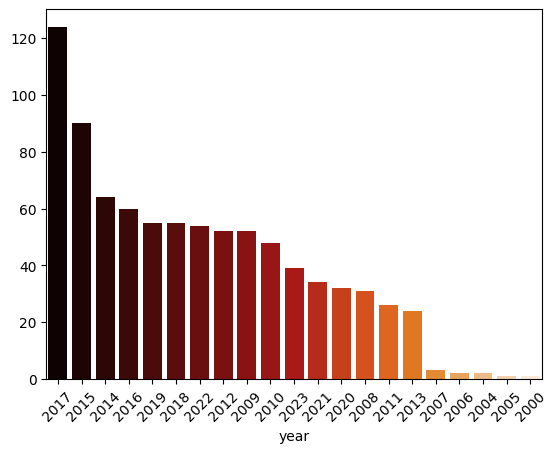

In [293]:
sns.barplot(x = df['year'].value_counts().keys(),
            hue = df['year'].value_counts().keys(),
            y = df['year'].value_counts().values,
            palette = 'gist_heat')

plt.xticks(rotation=45);

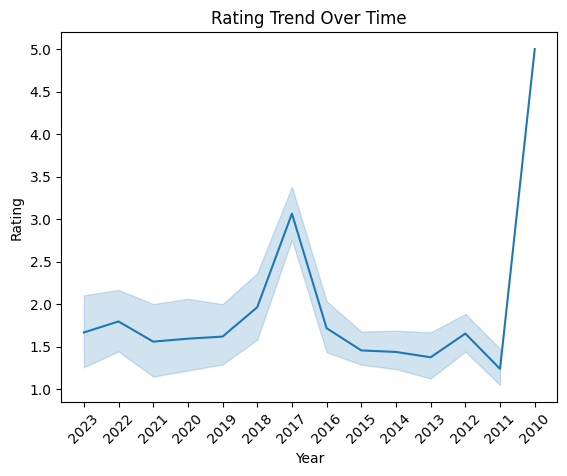

In [294]:
sns.lineplot(x='year', y='Rating', data=df)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Rating Trend Over Time')
plt.show()

In [327]:
df['year'] = df['year'].astype(int)

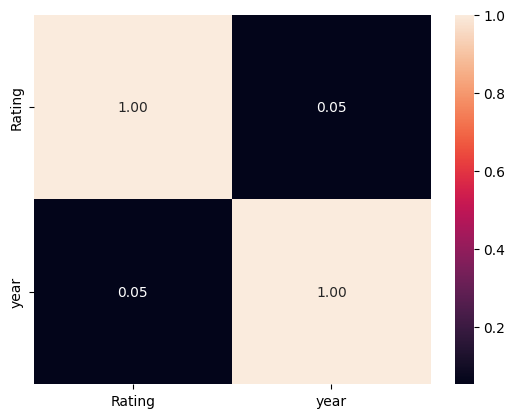

In [328]:
sns.heatmap(df[['Rating', 'year']].corr(), annot=True, fmt='.2f');

In [386]:
df.drop(df.columns.difference(['Review', 'Rating']), axis = 1, inplace = True)

In [387]:
df.head()

,Rating,Review
0,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...
2,5.0,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [388]:
df.dropna(inplace=True)

In [389]:
df.shape

(705, 2)

### Applying ML model on it

- cleaning text

In [ ]:
# !pip install --upgrade transformers
# !pip install --upgrade accelerate
# !pip install torch torchvision torchaudio

In [345]:
import re
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
import nltk

In [303]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [395]:
def lowercase_text(text):
    return text.lower()


def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)



stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]



lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [396]:
for i, review in enumerate(df['Review']):
    # Lowercasing
    review = lowercase_text(review)

    # Removing special characters
    review = remove_special_characters(review)

    # Tokenization (using a simple split for demonstration)
    # tokens = tokenize_text(tokenizer, review)

    # Removing stopwords
    tokens = remove_stopwords(review.split())

    # Lemmatization
    tokens = lemmatize_text(tokens)

    # Joining tokens back into text
    cleaned_review = ' '.join(tokens)

    # Overwriting the 'Review' column with the cleaned text
    df.at[i, 'Review'] = cleaned_review

In [405]:
df.head()

,Rating,Review
0,5.0,amber ladonna starbucks southwest parkway alwa...
1,5.0,starbucks fire station 436 altamonte spring fl...
2,5.0,wanted go way recognize starbucks employee bil...
3,5.0,friend starbucks card didnt work thankful work...
4,5.0,im kick drinking 5 cup warm water work instaca...


In [408]:
df.dropna(inplace=True)

In [409]:
df.isna().sum()

Rating    0
Review    0
dtype: int64

In [410]:
df.shape

(705, 2)

In [411]:
checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint,
                                                            num_labels = df['Rating'].nunique(),
                                                            problem_type="multi_class_classification")


def tokenize_text(tokenizer, text):
    return tokenizer.tokenize(text)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [412]:
df['Rating'].value_counts()

Rating
1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: count, dtype: int64

- Splitting the dataset

In [413]:
X = list(df.Review)
y = list(df.Rating)

In [414]:
set(y)

{1.0, 2.0, 3.0, 4.0, 5.0}

In [421]:
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size = 0.20, random_state = 0, shuffle=True)

### BERT model implementation

In [422]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)

In [423]:
class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        """
        Initializes the DataLoader class with encodings and labels.

        Args:
            encodings (dict): A dictionary containing tokenized input text data
                              (e.g., 'input_ids', 'token_type_ids', 'attention_mask').
            labels (list): A list of integer labels for the input text data.
        """
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        """
        Returns a dictionary containing tokenized data and the corresponding label for a given index.

        Args:
            idx (int): The index of the data item to retrieve.

        Returns:
            item (dict): A dictionary containing the tokenized data and the corresponding label.
        """
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        """
        Returns the number of data items in the dataset.

        Returns:
            (int): The number of data items in the dataset.
        """
        return len(self.labels)

In [425]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

In [ ]:
from transformers import TrainingArguments, Trainer



training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900Model',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
     # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics= compute_metrics
)

In [ ]:
trainer.train()

### Make Predictions

In [428]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.

    Args:
        pred (obj): An object containing label_ids and predictions attributes.
            - label_ids (array-like): A 1D array of true class labels.
            - predictions (array-like): A 2D array where each row represents
              an observation, and each column represents the probability of
              that observation belonging to a certain class.

    Returns:
        dict: A dictionary containing the following metrics:
            - Accuracy (float): The proportion of correctly classified instances.
            - F1 (float): The macro F1 score, which is the harmonic mean of precision
              and recall. Macro averaging calculates the metric independently for
              each class and then takes the average.
            - Precision (float): The macro precision, which is the number of true
              positives divided by the sum of true positives and false positives.
            - Recall (float): The macro recall, which is the number of true positives
              divided by the sum of true positives and false negatives.
    """
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }